# Anàlisi de les dades
## Nota sobre les limitacions de l'anàlisi 
Les dades obtingudes poden contenir errors deguts a:
- Errors en la recollida de dades a causa d'erros humans
- Errors en la classificació de les dades a causa d'errors informàtics

No es realitzarà una comprovació de les dades a causa de la magnitud de l'estudi i l'objectiu de l'anàlisi.
Tanmateix, en les conclusións de cada anàlisi es tindran en compte aquestes limitacions.

## Objectiu de l'anàlisi
L'objectiu és investigar si hi ha diferències fenotípiques significatives entre els pacients amb pneumònia aspirativa, els pacients que hipotetitzem que tenen pneumònia aspirativa perquè han resultat positius en el test MECV-V (i, per tant, la pneumònia diagnosticada és aspirativa), i els pacients que no tenen pneumònia aspirativa. Es pretén determinar si els dos primers grups són diferents del tercer grup, i en cas afirmatiu, identificar quines són aquestes diferències i quant significatives són.

## Importació de llibreries i funcions pròpies

In [1]:
import pandas as pd
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, comptatge_i_percentatge_cat, mitjana_i_std_num
from listas import num_var, cat_var, num_tests, cat_tests

## Càrrega de les dades
Les dades s'han tractat prèviament amb l'script 'process_database.py' i s'han guardat en un dataframe de Pandas. Aquestes dades contenen la informació de tots els pacients de l'estudi.

In [2]:
TOTAL = pd.read_pickle('./data/processed/dataframe.pkl')

## Segmentació de les dades
Es distribuiran el total de les dades en 3 grups:
- **AMB_PA**: aquest grup està compost per pacients que contenen el codi ICD de pneumònia aspirativa al seu historial.
- **AMB_PA_MECVV**: aquest grup conté els pacients que compleixen les següents característiques: 
    - Han donat positiu al MECV-V (és a dir, que tenen disfàgia i una alteració en la seguretat o en l'eficàcia)
    - Han sigut diagnosticats amb el codi ICD de pneumònia
    - Han passat menys de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu al MECV-V
- **SENSE_PA**: aquest grup està format per pacients que contenen el codi ICD de pneumònia o bé compleixen que:
    - Contenen el codi ICD de pneumònia
    - Han donat positiu al MECV-V
    - Han passat més de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu del MECV-V

### AMB_PA 

In [3]:
TOTAL[TOTAL["Classificació pacient"] == "AMB_PA"].head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
1,101,0,0,[],"[{'imc': '', 'anorexia': '2', 'perduaPes': '1'...","[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '57.700', 'data': '2017-10-30'}]","[{'codi': 'B01AB', 'dataInici': '2015-12-04 00...",[],...,None,0.0,2015-11-20,NaN,Dependència total,Malnodrit,Risc moderat,None,No disponible,AMB_PA
2,82,0,0,[],"[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '3', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2015-02-23 00...",[],...,None,None,NaT,NaN,Dependència total,Malnodrit,Risc alt,None,No disponible,AMB_PA
9,87,0,0,"[{'date': '20230505', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '3', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'M01AB', 'dataInici': '2023-05-09 00...",[],...,None,None,NaT,NaN,Dependència total,None,Risc alt,None,No disponible,AMB_PA
22,95,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'B01AB', 'dataInici': '2014-11-18 00...",[],...,None,None,2015-09-17,NaN,Dependència total,None,Risc moderat,None,No disponible,AMB_PA
26,88,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2013-11-28 00...",[],...,None,None,2015-01-22,NaN,Dependència total,None,Risc moderat,None,No disponible,AMB_PA


# AMB_PA_MECVV

In [4]:
TOTAL[TOTAL["Classificació pacient"] == "AMB_PA_MECVV"].head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
97,87,0,0,"[{'date': '20220310', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '77', 'data': '2023-06-06'}, {'valo...","[{'codi': 'B01AF', 'dataInici': '2022-03-23 00...","[{'data': '20220318112622', 'disfagia': 'N', '...",...,None,0.0,2022-03-09,1.0,Dependència total,None,Risc baix,None,No disponible,AMB_PA_MECVV
230,87,0,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'B01AB', 'dataInici': '2014-11-25 00...","[{'data': '20200911204331', 'disfagia': 'S', '...",...,None,None,2020-08-31,11.0,Dependència moderada,None,Risc moderat,None,No disponible,AMB_PA_MECVV
438,76,0,0,"[{'date': '20220607', 'name': 'GLUCOSA Sèrum',...","[{'imc': '3', 'anorexia': '2', 'perduaPes': '3...","[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '86', 'data': '2015-09-21'}, {'valo...","[{'codi': 'N02BE', 'dataInici': '2013-03-14 00...","[{'data': '20200416', 'pacientNoColabora': '',...",...,None,-10.6,2020-03-19,28.0,Dependència severa,Malnodrit,Risc baix,None,No disponible,AMB_PA_MECVV
572,84,1,0,"[{'date': '20230116', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '49.6', 'data': '2018-11-18'}, {'va...","[{'codi': 'N02BE', 'dataInici': '2017-07-29 00...","[{'data': '20210531112920', 'disfagia': 'S', '...",...,None,-0.3,2021-05-28,3.0,Dependència moderada,None,Risc baix,None,No disponible,AMB_PA_MECVV
576,95,0,0,"[{'date': '20230302', 'name': 'DENSITAT', 'loi...",[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '62', 'data': '2015-09-21'}, {'valo...","[{'codi': 'N02AJ', 'dataInici': '2014-03-18 00...","[{'data': '20230302133149', 'disfagia': 'S', '...",...,None,62.0,2023-02-27,3.0,Dependència severa,None,Risc moderat,None,No disponible,AMB_PA_MECVV


# SENSE_PA

In [5]:
TOTAL[TOTAL["Classificació pacient"] == "SENSE_PA"].head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
0,86,0,0,"[{'date': '20220929', 'name': 'GLUCOSA Sèrum',...",[],[],[],[],[],[],...,None,None,2018-10-03,NaN,None,None,None,None,No disponible,SENSE_PA
3,76,0,0,"[{'date': '20220729', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '39', 'data': '2023-08-11'}, {'valo...","[{'codi': 'R03AK', 'dataInici': '2023-07-25 00...",[],...,None,11.0,2023-07-24,NaN,Dependència severa,None,Risc baix,None,No disponible,SENSE_PA
4,67,0,0,"[{'date': '20230622', 'name': 'ANTIGEN H. PYLO...",[],[],[],[],[],[],...,None,None,2016-05-29,NaN,None,None,None,None,No disponible,SENSE_PA
5,93,0,0,"[{'date': '20220627', 'name': 'CREATININA Sèru...",[],[],[],[],"[{'codi': 'N02BE', 'dataInici': '2014-11-18 00...",[],...,None,None,2017-01-20,NaN,None,None,None,None,No disponible,SENSE_PA
6,92,0,0,"[{'date': '20230817', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '63.9', 'data': '2017-10-17'}, {'va...","[{'codi': 'B01AB', 'dataInici': '2017-10-02 00...","[{'data': '20230417132033', 'disfagia': 'S', '...",...,17.7,16.4,2017-10-02,2023.0,Dependència moderada,None,Risc baix,None,>10 kg,SENSE_PA


# TOTAL

In [6]:
TOTAL.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECV-V positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Pèrdua pes entre ingressos categòrica,Classificació pacient
0,86,0,0,"[{'date': '20220929', 'name': 'GLUCOSA Sèrum',...",[],[],[],[],[],[],...,None,None,2018-10-03,NaN,None,None,None,None,No disponible,SENSE_PA
1,101,0,0,[],"[{'imc': '', 'anorexia': '2', 'perduaPes': '1'...","[{'activitat': '3', 'estatMental': '1', 'humit...",[],"[{'valor': '57.700', 'data': '2017-10-30'}]","[{'codi': 'B01AB', 'dataInici': '2015-12-04 00...",[],...,None,0.0,2015-11-20,NaN,Dependència total,Malnodrit,Risc moderat,None,No disponible,AMB_PA
2,82,0,0,[],"[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '3', 'estatMental': '3', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2015-02-23 00...",[],...,None,None,NaT,NaN,Dependència total,Malnodrit,Risc alt,None,No disponible,AMB_PA
3,76,0,0,"[{'date': '20220729', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],"[{'valor': '39', 'data': '2023-08-11'}, {'valo...","[{'codi': 'R03AK', 'dataInici': '2023-07-25 00...",[],...,None,11.0,2023-07-24,NaN,Dependència severa,None,Risc baix,None,No disponible,SENSE_PA
4,67,0,0,"[{'date': '20230622', 'name': 'ANTIGEN H. PYLO...",[],[],[],[],[],[],...,None,None,2016-05-29,NaN,None,None,None,None,No disponible,SENSE_PA


Ara que es tenen totes les dades classificades en aquests grups, es realitzarà una descriptiva, retornant les mitjanes, desviacions estàndard, comptatges i percentatges en un format taula.

També es compararan els diferents grups amb el p-valor mitjançant T-test, test de Mann-Whitney o test Xi-quadrat per mirar la seva distribució, la qual s'espera que sigui similar entre el grup AMB_PA i AMB_PA_MECVV, i diferent entre SENSE_PA i els altres 2 grups.

Els tests que es van programar per les dues funcions encarregades d’aquesta anàlisi distributiva van ser els següents:
   - Funció per variables numèriques: fer primer un test de Shapiro-Wilk per comprovar si seguien una distribució normal, si és així, fer que la funció apliqui el T-test, i si no, el de Mann-Whitney. En el cas que les dades tinguessin una mida mostral superior a 5.000, per comprovar si la seguien una distribució normal, en comptes del test de Shapiro-Wilk, s’utilitzaria el de Kolmogorov-Smirnov.


   - Funció per variables categòriques: dur a terme directament el test Xi-quadrat.


# Anàlisi descriptiva de les dades

### Comptatges i percentatges de variables categòriques per grup

In [7]:
llista_dfs = [('AMB_PA', TOTAL[TOTAL["Classificació pacient"] == "AMB_PA"]),
              ('AMB_PA_MECVV', TOTAL[TOTAL["Classificació pacient"] == "AMB_PA_MECVV"]),
              ('SENSE_PA', TOTAL[TOTAL["Classificació pacient"] == "SENSE_PA"]),
              ('TOTAL', TOTAL)]

comptatge_i_percentatge_cat(llista_dfs, cat_var)

+----------------------------------------------------+--------------+-------+------------+--------------+
|                      Columna                       |  DataFrame   | Valor | Comptatges | Percentatges |
+----------------------------------------------------+--------------+-------+------------+--------------+
|                       sexe M                       |    AMB_PA    |   1   |    1605    |    50.87%    |
|                                                    |              |       |            |              |
|                       sexe M                       |    AMB_PA    |   0   |    1550    |    49.13%    |
|                                                    |              |       |            |              |
|                       sexe M                       | AMB_PA_MECVV |   0   |     98     |    52.69%    |
|                                                    |              |       |            |              |
|                       sexe M                

### Comptatges i percentatges de tests categòrics per grup

In [8]:
comptatge_i_percentatge_cat(llista_dfs, cat_tests)

+----------------------+--------------+----------------------------+------------+--------------+
|       Columna        |  DataFrame   |           Valor            | Comptatges | Percentatges |
+----------------------+--------------+----------------------------+------------+--------------+
|  Barthel categòric   |    AMB_PA    |     Dependència total      |    1360    |    49.60%    |
|                      |              |                            |            |              |
|  Barthel categòric   |    AMB_PA    |     Dependència severa     |    855     |    31.18%    |
|                      |              |                            |            |              |
|  Barthel categòric   |    AMB_PA    |    Dependència moderada    |    411     |    14.99%    |
|                      |              |                            |            |              |
|  Barthel categòric   |    AMB_PA    |        Independent         |    116     |    4.23%     |
|                      |      

### Mitjanes i desviacions estàndard de variables numèriques per grup

In [9]:
mitjana_i_std_num(llista_dfs, num_var)

+-----------------------+--------------+---------+---------------------+
|        Columna        |  DataFrame   | Mitjana | Desviació Estàndard |
+-----------------------+--------------+---------+---------------------+
|          edat         |    AMB_PA    |  91.24  |         8.49        |
|                       |              |         |                     |
|          edat         | AMB_PA_MECVV |  87.72  |         7.62        |
|                       |              |         |                     |
|          edat         |   SENSE_PA   |  87.40  |        13.06        |
|                       |              |         |                     |
|          edat         |    TOTAL     |  87.97  |        12.53        |
|                       |              |         |                     |
|                       |              |         |                     |
|      Mitjana pes      |    AMB_PA    |  57.39  |        21.96        |
|                       |              |         | 

C:\Users\jmiro\GitHub\PRACTICUM\auxiliary_functions.py:1141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col],


### Mitjanes i desviacions estàndard dels tests numèrics per grup

In [10]:
mitjana_i_std_num(llista_dfs, num_tests)

+---------------------+--------------+---------+---------------------+
|       Columna       |  DataFrame   | Mitjana | Desviació Estàndard |
+---------------------+--------------+---------+---------------------+
|  Barthel resultats  |    AMB_PA    |  31.74  |        31.69        |
|                     |              |         |                     |
|  Barthel resultats  | AMB_PA_MECVV |  55.11  |        32.82        |
|                     |              |         |                     |
|  Barthel resultats  |   SENSE_PA   |  64.66  |        32.59        |
|                     |              |         |                     |
|  Barthel resultats  |    TOTAL     |  56.96  |        35.21        |
|                     |              |         |                     |
|                     |              |         |                     |
|   EMINA resultats   |    AMB_PA    |   8.18  |         3.63        |
|                     |              |         |                     |
|   EM

## Nombre de pacients

In [11]:
print("Nombre de pacients amb pneumònia aspirativa (ICD = J69.0):", len(TOTAL[TOTAL["Classificació pacient"] == "AMB_PA"]))
print("Nombre de pacients amb pneumònia i un MECV-V positiu:", len(TOTAL[TOTAL["Classificació pacient"] == "AMB_PA_MECVV"]))
print("Nombre de pacients amb pneumònia sense comptar amb ICD J69.0:", len(TOTAL[TOTAL["Classificació pacient"] == "SENSE_PA"]))
print("Nombre total de pacients:", len(TOTAL))

Nombre de pacients amb pneumònia aspirativa (ICD = J69.0): 3155
Nombre de pacients amb pneumònia i un MECV-V positiu: 186
Nombre de pacients amb pneumònia sense comptar amb ICD J69.0: 18197
Nombre total de pacients: 21538


#### Comparació distributiva. Test d'independència
No es pot calcular la normalitat perquè només hi ha un valor per grup i tampoc té sentit calcular el p-valor.  

## Edat

#### Comparació distributiva. Test d'independència

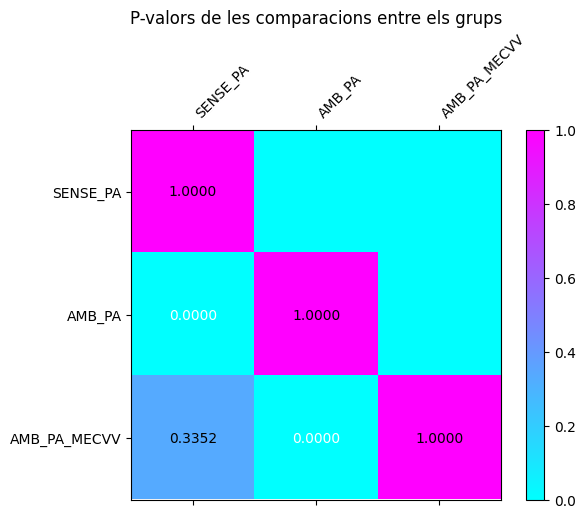

In [12]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['edat'])

## Sexe

#### Comparació distributiva. Test d'independència

In [13]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['sexe M'])

Chi-squared: 12.0200
P-value: 0.0025
---


(0.002454149398692775,
   Categoria 1   Categoria 2  Chi-squared   P-value
 0    SENSE_PA        AMB_PA     9.182906  0.002443
 1    SENSE_PA  AMB_PA_MECVV     2.867332  0.090395
 2      AMB_PA  AMB_PA_MECVV     0.753762  0.385288)

## Admissions

#### Comparació distributiva. Test d'independència

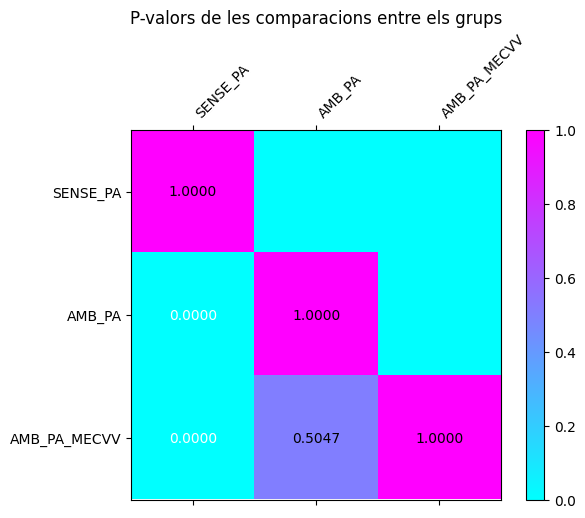

In [14]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Admissions'])

## Admissions per urgències

#### Comparació distributiva. Test d'independència 

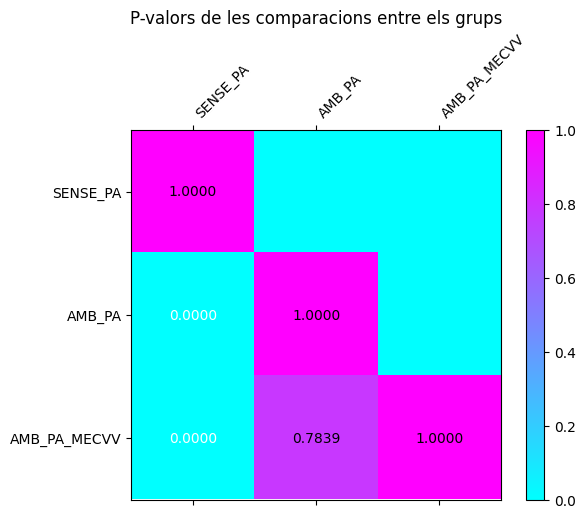

In [15]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Emergències'])

## Disfàgia

#### Comparació distributiva. Test d'independència

In [16]:
test_indepe_bin_plot(data_1=TOTAL['Classificació pacient'], data_2=TOTAL['DO diagnosticada'])

Chi-squared: 3648.6871
P-value: 0.0000
---


(0.0,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA  3647.980404  0.000000e+00
 1    SENSE_PA  AMB_PA_MECVV    27.000658  2.033862e-07
 2      AMB_PA  AMB_PA_MECVV    84.759289  3.369922e-20)

## Index de Barthel

#### Comparació distributiva. Test d'independència

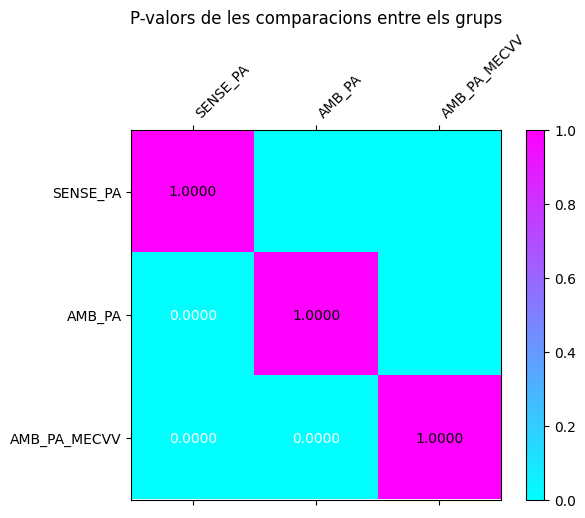

In [17]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Barthel resultats'])

## Categories índex de Barthel

#### Comparació distributiva. Test d'independència

In [18]:
test_indepe_bin_plot(data_1=TOTAL['Classificació pacient'], data_2=TOTAL['Barthel categòric'])

Chi-squared: 1769.9190
P-value: 0.0000
---


(0.0,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA  1760.088473  0.000000e+00
 1    SENSE_PA  AMB_PA_MECVV    15.779886  1.258108e-03
 2      AMB_PA  AMB_PA_MECVV    82.532608  8.784041e-18)

## Index del MNA

#### Comparació distributiva. Test d'independència

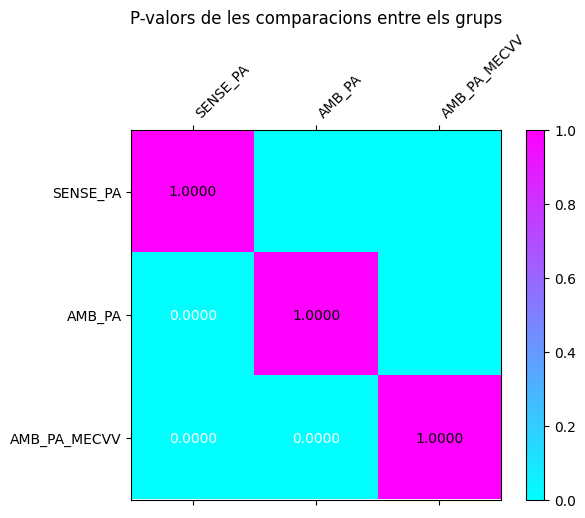

In [19]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['MNA resultats'])

## Categories test MNA

#### Comparació distributiva. Test d'independència 

In [20]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['MNA categòric'])

Chi-squared: 194.2152
P-value: 0.0000
---


(6.582808305879636e-41,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    35.652194  1.812276e-08
 1    SENSE_PA  AMB_PA_MECVV   119.320054  1.230211e-26
 2      AMB_PA  AMB_PA_MECVV   218.308701  3.934304e-48)

## Index de l'EMINA

#### Comparació distributiva. Test d'independència

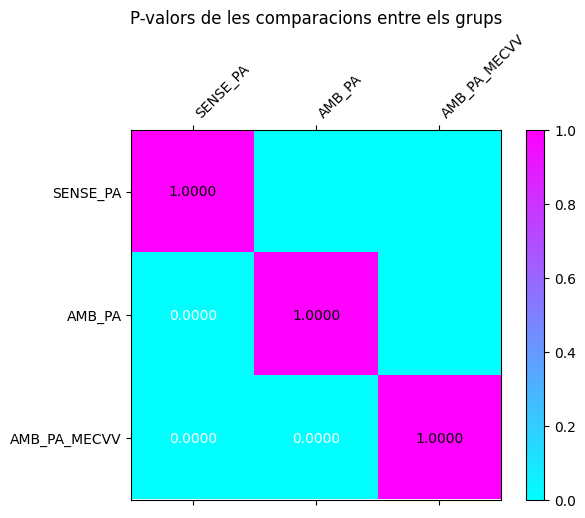

Chi-squared: 2364.2511
P-value: 0.0000
---


(0.0,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA  2351.617315  0.000000e+00
 1    SENSE_PA  AMB_PA_MECVV    18.320640  1.051292e-04
 2      AMB_PA  AMB_PA_MECVV   109.209572  1.929491e-24)

In [21]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['EMINA resultats'])
test_indepe_bin_plot(data_1=TOTAL['Classificació pacient'], data_2=TOTAL['EMINA categòric'])

## Categories de l'índex de l'EMINA

#### Comparació distributiva. Test d'independència

In [22]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['EMINA categòric'])

Chi-squared: 2364.2511
P-value: 0.0000
---


(0.0,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA  2351.617315  0.000000e+00
 1    SENSE_PA  AMB_PA_MECVV    18.320640  1.051292e-04
 2      AMB_PA  AMB_PA_MECVV   109.209572  1.929491e-24)

## Index de la canadenca (escala neurològica canadenca)

#### Comparació distributiva. Test d'independència

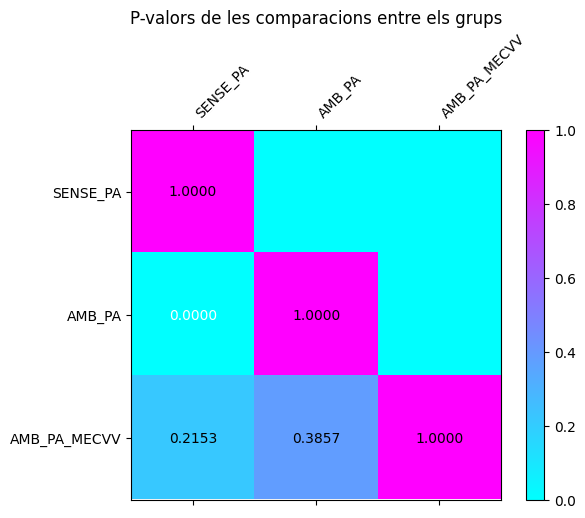

In [23]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Canadenca resultats'])

## Categories de l'índex de la canadenca

#### Comparació distributiva. Test d'independència 

In [24]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Canadenca categòrica'])

Chi-squared: 47.1761
P-value: 0.0000
---


(5.6994141760861815e-11,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    44.103933  3.113947e-11
 1    SENSE_PA  AMB_PA_MECVV     3.808710  5.098670e-02
 2      AMB_PA  AMB_PA_MECVV     0.000000  1.000000e+00)

## Infeccions respiratòries

#### Comparació distributiva. Test d'independència 

In [25]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Infeccions respiratòries principals diagnosticades'])

Chi-squared: 195.0790
P-value: 0.0000
---


(4.3563493197337845e-43,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    10.528036  1.175771e-03
 1    SENSE_PA  AMB_PA_MECVV   187.081356  1.378584e-42
 2      AMB_PA  AMB_PA_MECVV   139.881759  2.825338e-32)

In [26]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['LRTI diagnosticada'])

Chi-squared: 231.0262
P-value: 0.0000
---


(6.812354896530734e-51,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA    34.934497  3.409856e-09
 1    SENSE_PA  AMB_PA_MECVV   205.255955  1.489145e-46
 2      AMB_PA  AMB_PA_MECVV   122.799833  1.542513e-28)

In [27]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Exacerbacions de COPD diagnosticades'])

Chi-squared: 25.2095
P-value: 0.0000
---


(3.3560181898892892e-06,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA     1.892759  1.688911e-01
 1    SENSE_PA  AMB_PA_MECVV    21.485979  3.564252e-06
 2      AMB_PA  AMB_PA_MECVV    24.280225  8.328979e-07)

In [28]:
test_indepe_bin_plot(data_1= TOTAL['Classificació pacient'], data_2= TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

Chi-squared: 27.7982
P-value: 0.0000
---


(9.198195842368882e-07,
   Categoria 1   Categoria 2  Chi-squared       P-value
 0    SENSE_PA        AMB_PA     2.491930  1.144313e-01
 1    SENSE_PA  AMB_PA_MECVV    20.016246  7.678699e-06
 2      AMB_PA  AMB_PA_MECVV    25.843692  3.702126e-07)

# Resultats de laboratori

## Albúmina

#### Comparació distributiva. Test d'independència

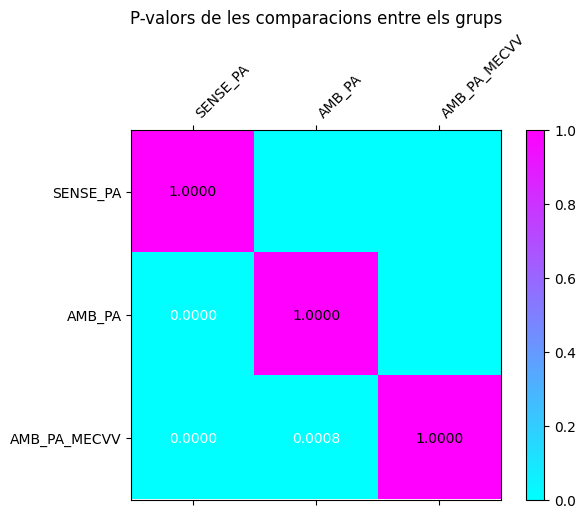

In [29]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Albúmina'])

### Proteïnes totals

#### Comparació distributiva. Test d'independència

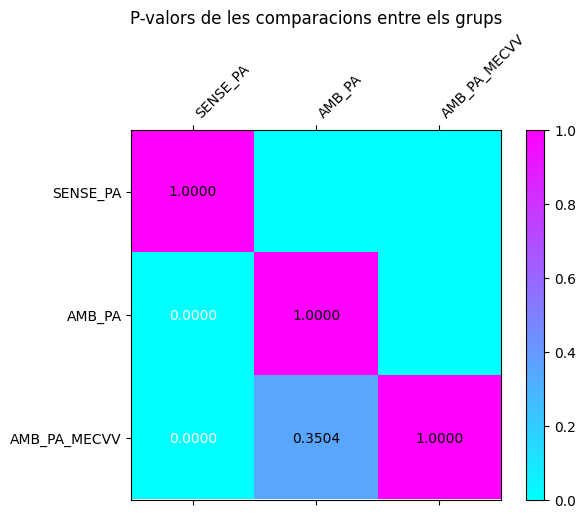

In [30]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Proteïnes totals sèrum'])

### Hemoglobina

#### Comparació distributiva. Test d'independència

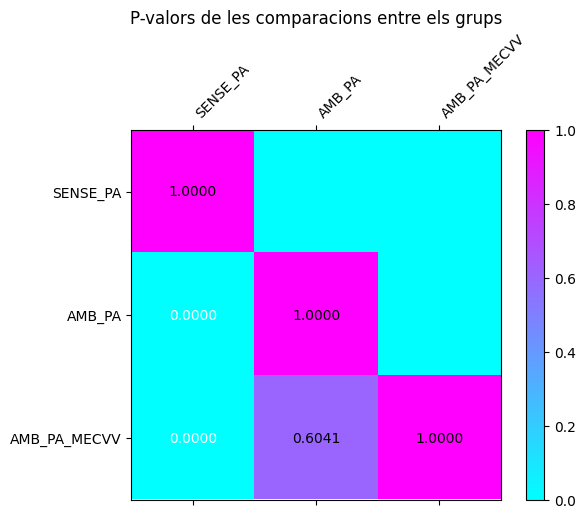

In [31]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Hemoglobina'])

### Colesterol 

#### Comparació distributiva. Test d'independència

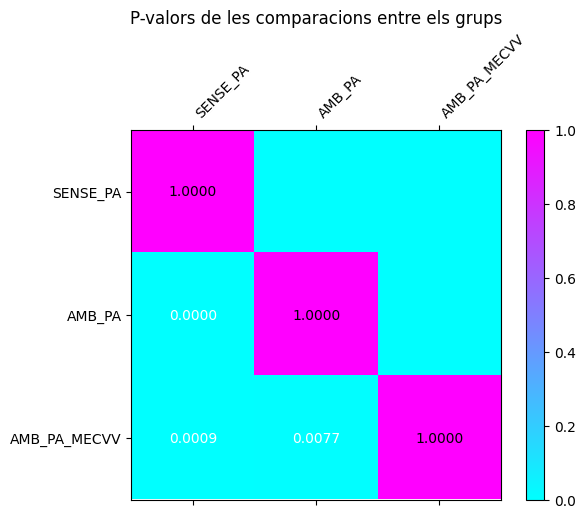

In [32]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Colesterol total'])

### Leucòcits

#### Comparació distributiva. Test d'independència

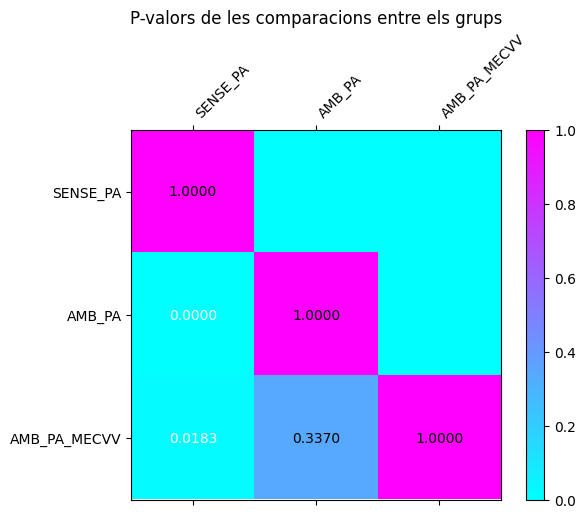

In [33]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Leucòcits'])

### Limfòcits %

#### Comparació distributiva. Test d'independència

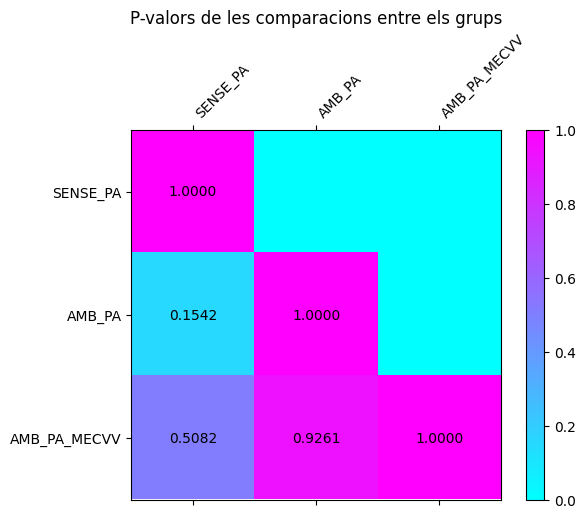

In [34]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Limfòcits'])

### Proteïna C reactiva

#### Comparació distributiva. Test d'independència

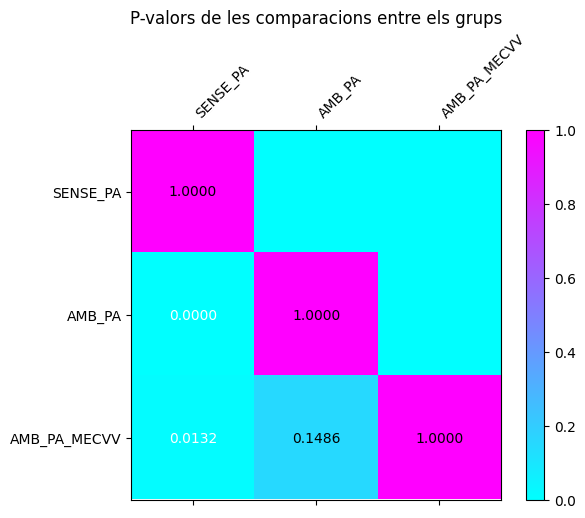

In [35]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Proteïna C reactiva'])

### Urea 

#### Comparació distributiva. Test d'independència

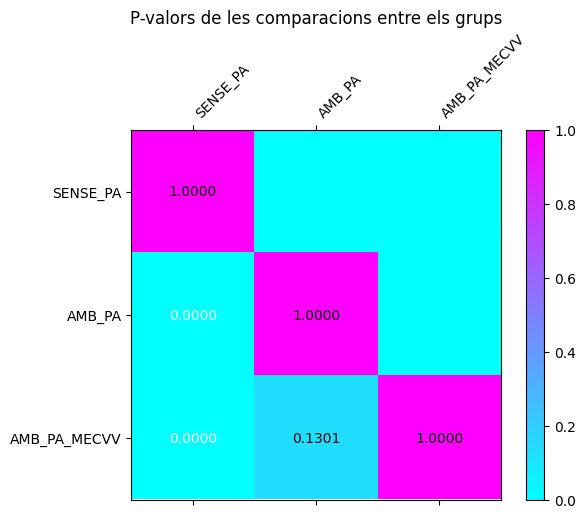

In [36]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Urea'])

### Filtració glomerular

#### Comparació distributiva. Test d'independència.

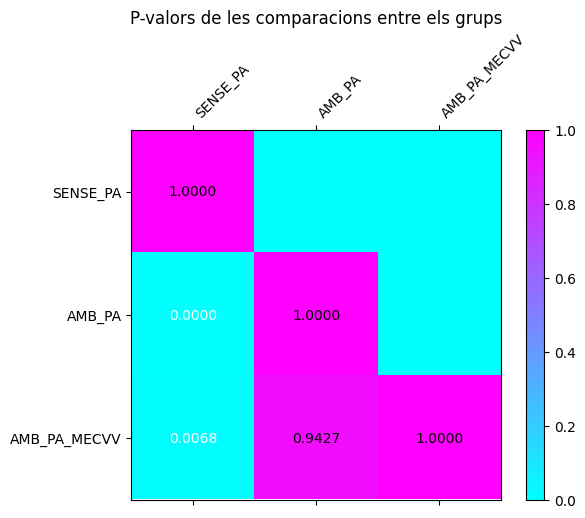

In [37]:
test_indepe_plot(category_labels=TOTAL['Classificació pacient'], numeric_values=TOTAL['Filtrat glomerular'])